# Ciencia De Dados - Detectando Fraudes Em Transferências Bancárias

## Qual o Problema de Negócio

Esse conjunto de dados fictício possui transações de transferências entre contas de uma mesma Instituição Financeira. São mais de 200 mil registros de transferências, sendo 490 Fraudulentas, ou seja, não foram realizadas pelo dono da conta corrente. Temos 28 variáveis explicativas e a variável Classe é o Target e assume o valor 1 em caso de fraude e 0 em caso contrário.

In [73]:
#Bibliotecas padrão
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings(action="ignore")

#Bibliotecas para pré-processamento de dados
#from imblearn.over_sampling import SMOTE
#from sklearn.model_selection import train_test_split

In [74]:
df=pd.read_csv("transferencias.csv")

**Vendo a quantidade de linhas e colunas**

In [75]:
print("\nDIMENÇÕES DO DATAFRAME")
print("\nLINHAS: ",df.shape[0])
print("COLUNAS: ",df.shape[1])


DIMENÇÕES DO DATAFRAME

LINHAS:  284807
COLUNAS:  31


**Vendo as 5 primeiras Linhas**

In [76]:
df.head()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Vendo algumas informações do nosso DataFrame**

Só de olhar essas informações podemos ver que esse Dataset foi muito bem trabalhado e que não temos valores NAN ou valore infinitos

In [77]:
#Vendo o tipo de cada variavel

df.dtypes

Timestamp          float64
pais               float64
cidade             float64
bairro             float64
cep                float64
ip                 float64
dia                float64
hora               float64
minuto             float64
so                 float64
valor              float64
antecedentes       float64
reclamacoes        float64
qtd_trans          float64
crt                float64
limite_global      float64
tipo_crt           float64
estabelecimento    float64
contas             float64
emprestimos        float64
navegador          float64
android            float64
ios                float64
compras            float64
hist_navegacao     float64
relacionamento     float64
ind_seguranca      float64
tempo_transacao    float64
lim_crt            float64
hist_saldo         float64
Target               int64
dtype: object

In [78]:
#Contando a quandtidade de valores em cada coluna
df.count()

Timestamp          284807
pais               284807
cidade             284807
bairro             284807
cep                284807
ip                 284807
dia                284807
hora               284807
minuto             284807
so                 284807
valor              284807
antecedentes       284807
reclamacoes        284807
qtd_trans          284807
crt                284807
limite_global      284807
tipo_crt           284807
estabelecimento    284807
contas             284807
emprestimos        284807
navegador          284807
android            284807
ios                284807
compras            284807
hist_navegacao     284807
relacionamento     284807
ind_seguranca      284807
tempo_transacao    284807
lim_crt            284807
hist_saldo         284807
Target             284807
dtype: int64

In [79]:
##Informações Básicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        284807 non-null  float64
 1   pais             284807 non-null  float64
 2   cidade           284807 non-null  float64
 3   bairro           284807 non-null  float64
 4   cep              284807 non-null  float64
 5   ip               284807 non-null  float64
 6   dia              284807 non-null  float64
 7   hora             284807 non-null  float64
 8   minuto           284807 non-null  float64
 9   so               284807 non-null  float64
 10  valor            284807 non-null  float64
 11  antecedentes     284807 non-null  float64
 12  reclamacoes      284807 non-null  float64
 13  qtd_trans        284807 non-null  float64
 14  crt              284807 non-null  float64
 15  limite_global    284807 non-null  float64
 16  tipo_crt         284807 non-null  floa

In [80]:
#Vendo algumas informações estátisticas

df.describe()

,Timestamp,pais,cidade,bairro,cep,ip,dia,hora,minuto,so,...,android,ios,compras,hist_navegacao,relacionamento,ind_seguranca,tempo_transacao,lim_crt,hist_saldo,Target
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Verificando valores NAN**

In [81]:
#Vendo se exitem valores nulos tipo inf NaN etc..
(df.isnull().sum())/df.shape[0]

Timestamp          0.0
pais               0.0
cidade             0.0
bairro             0.0
cep                0.0
ip                 0.0
dia                0.0
hora               0.0
minuto             0.0
so                 0.0
valor              0.0
antecedentes       0.0
reclamacoes        0.0
qtd_trans          0.0
crt                0.0
limite_global      0.0
tipo_crt           0.0
estabelecimento    0.0
contas             0.0
emprestimos        0.0
navegador          0.0
android            0.0
ios                0.0
compras            0.0
hist_navegacao     0.0
relacionamento     0.0
ind_seguranca      0.0
tempo_transacao    0.0
lim_crt            0.0
hist_saldo         0.0
Target             0.0
dtype: float64

In [82]:
#Vendo se existem valores NAN
(df.isna().sum())/df.shape[0]

Timestamp          0.0
pais               0.0
cidade             0.0
bairro             0.0
cep                0.0
ip                 0.0
dia                0.0
hora               0.0
minuto             0.0
so                 0.0
valor              0.0
antecedentes       0.0
reclamacoes        0.0
qtd_trans          0.0
crt                0.0
limite_global      0.0
tipo_crt           0.0
estabelecimento    0.0
contas             0.0
emprestimos        0.0
navegador          0.0
android            0.0
ios                0.0
compras            0.0
hist_navegacao     0.0
relacionamento     0.0
ind_seguranca      0.0
tempo_transacao    0.0
lim_crt            0.0
hist_saldo         0.0
Target             0.0
dtype: float64

**Plotando alguns gráficos para entendermos melhor o problema**

In [83]:
(df["Target"].value_counts())/df.shape[0]

0    0.998273
1    0.001727
Name: Target, dtype: float64

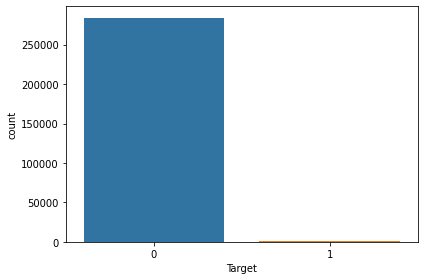

In [84]:
fig,ax=plt.subplots()


sns.countplot("Target",data=df,ax=ax)

plt.tight_layout();

In [95]:
np.bincount(df["Target"])# Veja o quando isso está desbalanciado, não conseguiremos fazer a nossa maquina preditiva

array([284315,    492])

Nos temos uma classe hiper-desbalanciada, nos temos **0-Não teve fraude e 1-Teve fraude**
e veja que a barra do **não teve fraude** só aparece uma linha isso porque existem muito mais transferências bancarias que não são fraudes do que transferências **fraudulentas**.

Só que se eu fazer uma maquina preditiva do jeito que está eu não vou conseguir fazer uma maquina preditiva que faça previsão de fraude, porque tem muito pouco registo de **Teve Fraude** então para resolver isso irei fazer um trabalho para equilibrar essa class e construir uma maquina preditiva..

**Explorando a correlação**

In [85]:
df.corr()["Target"].sort_values(ascending=False)

Target             1.000000
antecedentes       0.154876
cep                0.133447
cidade             0.091289
android            0.040413
emprestimos        0.034783
navegador          0.020090
minuto             0.019875
tempo_transacao    0.017580
lim_crt            0.009536
hist_saldo         0.005632
ind_seguranca      0.004455
relacionamento     0.003308
ios                0.000805
compras           -0.002685
limite_global     -0.004223
qtd_trans         -0.004570
hist_navegacao    -0.007221
Timestamp         -0.012323
dia               -0.043643
ip                -0.094974
so                -0.097733
pais              -0.101347
contas            -0.111485
hora              -0.187257
bairro            -0.192961
tipo_crt          -0.196539
valor             -0.216883
reclamacoes       -0.260593
crt               -0.302544
estabelecimento   -0.326481
Name: Target, dtype: float64

<AxesSubplot:>

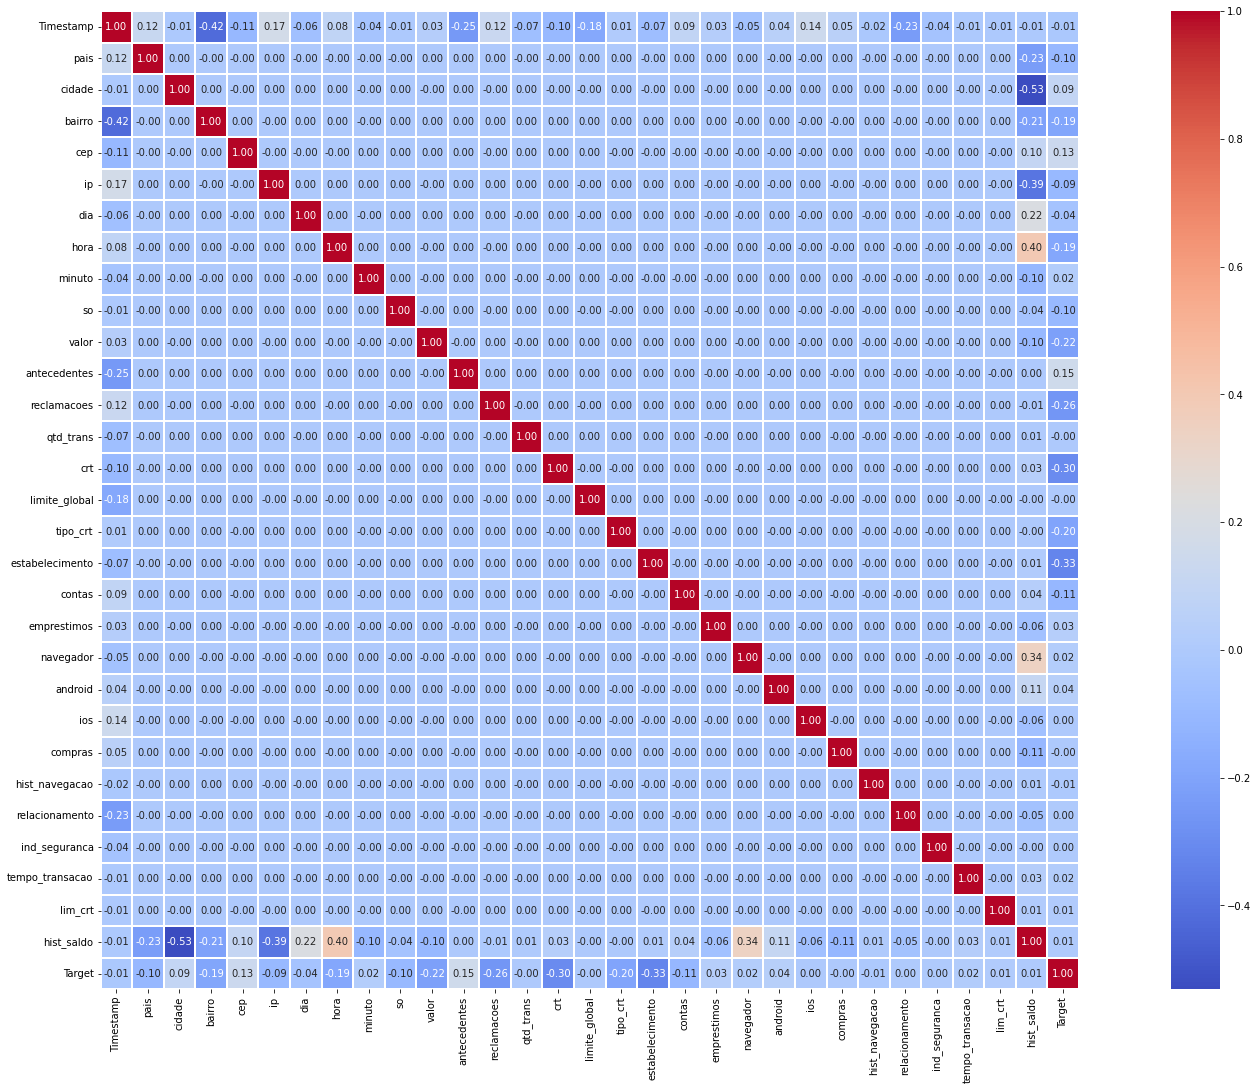

In [86]:
#df.corr(method="spearman")
fig,ax=plt.subplots(figsize = (33,18))

sns.heatmap(df.corr(),cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True,ax=ax)

## Pré-Processamento dos dados

- Há desbalanceamento da classe (target)?

- Também pode ser complicado lidar com outliers se não entendermos o domínio e o contexto do problema o suficiente.

In [87]:
X=df.drop("Target",axis=1)

In [88]:
Y=df["Target"]

In [96]:
#Balanceamento da Classe (Target)

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [97]:
smt=SMOTE()

In [98]:
X,Y=smt.fit_resample(X, Y)

In [99]:
yi=Y.astype(int)

In [100]:
np.bincount(yi)#Agora sim conseguiremos fazer a nossa maquina preditiva

array([284315, 284315])

<AxesSubplot:xlabel='Target', ylabel='count'>

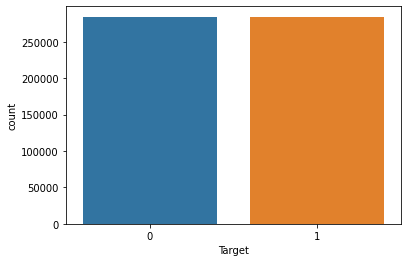

In [101]:
sns.countplot(yi)

Agora posso fazer a maquina preditiva avontade, isso porque já balanceamos os dados das duas classes com isso podemos fazer previsão se há ou não há fraudes

In [102]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=7,stratify=Y)

## Criando a Máquina Preditiva de Detecção de Fraude

In [113]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score



### XGBoost

In [114]:
modelo1=XGBClassifier()

In [115]:
modelo1.fit(x_train,y_train)

[11:45:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
y_pred=modelo1.predict(x_test)

In [118]:
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [119]:
y_pred_proba=modelo1.predict_proba(x_test)

In [120]:
y_pred_proba

array([[9.9999893e-01, 1.0623360e-06],
       [1.1932850e-04, 9.9988067e-01],
       [9.9993968e-01, 6.0293401e-05],
       ...,
       [1.0728836e-06, 9.9999893e-01],
       [9.9999994e-01, 7.2407346e-08],
       [9.9998999e-01, 1.0000724e-05]], dtype=float32)

### Avaliando a Máquina Preditiva

In [121]:
gabarito = pd.DataFrame({'Gabarito': y_test,'Previsoes_da_Máquina': y_pred})
gabarito

,Gabarito,Previsoes_da_Máquina
32637,0,0
310248,1,1
239726,0,0
264244,0,0
414052,1,1
...,...,...
145904,0,0
57389,0,0
454470,1,1
229461,0,0


In [123]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_test, y_pred))


Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       1.00      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [124]:
print('Acurácia: \n', accuracy_score(y_test, y_pred))


Acurácia: 
 0.9998241387193781


In [125]:

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[85264    30]
 [    0 85295]]


### Light GBM

In [126]:
# Light GBM
train_data=lgb.Dataset(x_train,label=y_train)
#setting parameters for lightgbm
param = {'num_leaves':1000,         #número de folhas em uma árvore; padrão = 31; type = int
         'objective':'binary',     
         'max_depth':7,
         'learning_rate':.01,
         'max_bin':200}

param['metric'] = ['auc', 'binary_logloss']

#training our model using light gbm
num_round=50

lgbm=lgb.train(param,train_data,num_round)


[LightGBM] [Info] Number of positive: 199020, number of negative: 199021
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6000
[LightGBM] [Info] Number of data points in the train set: 398041, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499999 -> initscore=-0.000005
[LightGBM] [Info] Start training from score -0.000005
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

In [128]:
y_predict = lgbm.predict(x_test)

In [129]:
y_predict

array([0.30500955, 0.69689373, 0.35754018, ..., 0.69689373, 0.30500955,
       0.31337046])

In [130]:
gabarito = pd.DataFrame({'Gabarito': y_test,'Previsoes_da_Máquina': y_predict})
gabarito

,Gabarito,Previsoes_da_Máquina
32637,0,0.305010
310248,1,0.696894
239726,0,0.357540
264244,0,0.305010
414052,1,0.696894
...,...,...
145904,0,0.306764
57389,0,0.305010
454470,1,0.696894
229461,0,0.305010


In [131]:
y_predict.size

170589

In [132]:
#converting probabilities into 0 or 1
for i in range(0,170589):
    if y_predict[i]>=.5:       # setting threshold to .5
       y_predict[i]=1
    else:  
       y_predict[i]=0

In [141]:
print('Classification metrics: \n', classification_report(y_test, y_predict))
print('Acurácia: \n', accuracy_score(y_test, y_predict))
#0.9843  F1 98%
print('Confusion Matrix: \n', confusion_matrix(y_test, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     85294
           1       0.99      0.98      0.98     85295

    accuracy                           0.98    170589
   macro avg       0.99      0.98      0.98    170589
weighted avg       0.99      0.98      0.98    170589

Acurácia: 
 0.98494627437877
Confusion Matrix: 
 [[84607   687]
 [ 1881 83414]]


### Random Forest

In [145]:
modelo3=RandomForestClassifier()

In [146]:
modelo3.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=modelo3.predict(x_test)